.. _main_calculation_immigrant:

# Main Calculation Immigration

In order to immigrate existing CRYSTAL17 calculations,
the :py:mod:`aiida_crystal17.immigration` module has been
created to take a ``.d12`` and ``.out`` file set
and replicate a ``crystal17.main`` calculation:

.. note::

    This approach may be subject to change, 
    if a general approach is developed for immigrant calculations
    (see [this ongoing issue](https://github.com/aiidateam/aiida_core/issues/1892)).


In [1]:
from aiida import load_profile
profile = load_profile()
import os
from aiida_crystal17.tests import TEST_FILES
from aiida_crystal17.tests.utils import (
    get_or_create_local_computer, get_or_create_code, 
    get_default_metadata)
from aiida_crystal17.immigration.create_inputs import populate_builder
from aiida_crystal17.immigration.create_calcjob import immigrate_existing
from aiida_crystal17.common import display_json
from aiida_crystal17.graph import Graph
from aiida.orm import Code, RemoteData
from aiida.common.folders import Folder

:py:func:`aiida_crystal17.immigration.create_inputs.populate_builder`
will create an input builder for the `crystal17.main` calculation,
from a `FolderData` node, populated with the files, and a `Code` node.

In [2]:
computer = get_or_create_local_computer('work_directory', 'localhost')
code = get_or_create_code('crystal17.main', computer, 'mock_crystal17')

In [4]:
metadata = get_default_metadata()
metadata['options'].update({
    "input_file_name": 'INPUT',
    "output_main_file_name": "main.out"
})
remote = RemoteData(
    remote_path=os.path.join(
        TEST_FILES, "crystal", "nio_sto3g_afm_opt"), 
    computer=computer)

builder = populate_builder(
    remote, code=code, 
    metadata=metadata)

display_json(builder)

```json
{
  "metadata": {
    "options": {
      "resources": {
        "num_machines": 1,
        "num_mpiprocs_per_machine": 1
      },
      "max_wallclock_seconds": 1800,
      "withmpi": false,
      "input_file_name": "INPUT",
      "output_main_file_name": "main.out"
    },
    "dry_run": false
  },
  "basissets": {
    "Ni": [
      "uuid: 7f91a637-a366-47f1-9ce3-7e017c82b5a2 (unstored)"
    ],
    "O": [
      "uuid: c3af1c12-115e-44b2-8106-2f79ba8110a7 (unstored)"
    ]
  },
  "parameters": [
    "uuid: 1202e201-9d63-4cc0-a56e-a8994cc025a3 (unstored)"
  ],
  "structure": [
    "uuid: 2aaebcff-f346-4e25-8e7b-486976aaedd9 (unstored)"
  ],
  "symmetry": [
    "uuid: 401e4040-b5b9-49b9-8be4-a12a13219323 (unstored)"
  ],
  "kinds": [
    "uuid: 273af613-1941-4027-86ff-40afc3e46231 (unstored)"
  ],
  "code": [
    "Remote code 'crystal17.main-mock_crystal17@localhost' on localhost,",
    "pk: 23, uuid: 8451bd5e-397a-4014-9982-340b571a48c8"
  ]
}
```

:py:func:`aiida_crystal17.immigration.create_calcjob.immigrate_existing`
creates a `CalcJobNode` and uses the above function,
and the `crystal17.main` parser, to create and attach incoming and outgoing nodes,
replicating a full calculation.

In [5]:
calc_node = immigrate_existing(
    builder, remote)
calc_node

<CalcJobNode: uuid: 0301919d-10b9-4289-b2cd-ec6c60553998 (pk: 49) (aiida.calculations:crystal17.main)>

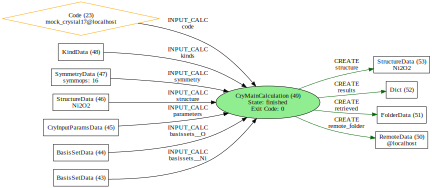

In [6]:
graph = Graph(graph_attr={'size': "6,8!", "rankdir": "LR"})
graph.add_node(calc_node)
graph.add_incoming(calc_node, annotate_links="both")
graph.add_outgoing(calc_node, annotate_links="both")
graph.graphviz

In [7]:
calc_node.attributes

{'sealed': True,
 'withmpi': False,
 'resources': {'num_machines': 1, 'num_mpiprocs_per_machine': 1},
 'append_text': '',
 'exit_status': 0,
 'parser_name': 'crystal17.main',
 'prepend_text': '',
 'process_label': 'CryMainCalculation',
 'process_state': 'finished',
 'retrieve_list': ['main.out',
  'fort.34',
  '_scheduler-stdout.txt',
  '_scheduler-stderr.txt'],
 'remote_workdir': '/Users/cjs14/GitHub/aiida-crystal17/aiida_crystal17/tests/raw_files/crystal/nio_sto3g_afm_opt',
 'input_file_name': 'INPUT',
 'scheduler_stderr': '_scheduler-stderr.txt',
 'scheduler_stdout': '_scheduler-stdout.txt',
 'mpirun_extra_params': [],
 'environment_variables': {},
 'max_wallclock_seconds': 1800,
 'output_main_file_name': 'main.out',
 'import_sys_environment': True,
 'retrieve_temporary_list': ['opt[ac][0-9][0-9][0-9]'],
 'custom_scheduler_commands': ''}

In [8]:
calc_node.extras

{'immigrated': True,
 '_aiida_hash': '6e5e856b4b76272266e2c42873abe25f5b68848913fb0cb3f13dc41029b44ff0',
 'immigration_func': 'aiida_crystal17.immigration.create_calcjob'}